In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tilda-400-64x64-patches/good/211_patch2-3.png
/kaggle/input/tilda-400-64x64-patches/good/240_patch2-6.png
/kaggle/input/tilda-400-64x64-patches/good/005_patch1-5.png
/kaggle/input/tilda-400-64x64-patches/good/391_patch1-6.png
/kaggle/input/tilda-400-64x64-patches/good/290_patch3-0.png
/kaggle/input/tilda-400-64x64-patches/good/149_patch3-4.png
/kaggle/input/tilda-400-64x64-patches/good/358_patch5-2.png
/kaggle/input/tilda-400-64x64-patches/good/110_patch7-0.png
/kaggle/input/tilda-400-64x64-patches/good/016_patch3-1.png
/kaggle/input/tilda-400-64x64-patches/good/333_patch1-1.png
/kaggle/input/tilda-400-64x64-patches/good/317_patch2-5.png
/kaggle/input/tilda-400-64x64-patches/good/306_patch1-0.png
/kaggle/input/tilda-400-64x64-patches/good/298_patch6-0.png
/kaggle/input/tilda-400-64x64-patches/good/032_patch2-6.png
/kaggle/input/tilda-400-64x64-patches/good/105_patch4-7.png
/kaggle/input/tilda-400-64x64-patches/good/241_patch2-7.png
/kaggle/input/tilda-400-64x64-patches/go


Split 1/5
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


I0000 00:00:1741365049.738415      95 service.cc:145] XLA service 0x780bdc005920 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741365049.738473      95 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1741365049.738479      95 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   3/2897 ━━━━━━━━━━━━━━━━━━━━ 1:54 40ms/step - accuracy: 0.2205 - loss: 1.9722   

I0000 00:00:1741365090.380700      95 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2897/2897 ━━━━━━━━━━━━━━━━━━━━ 172s 35ms/step - accuracy: 0.8208 - loss: 0.4915 - val_accuracy: 0.9646 - val_loss: 0.1865
Epoch 2/20
2897/2897 ━━━━━━━━━━━━━━━━━━━━ 61s 21ms/step - accuracy: 0.9751 - loss: 0.0832 - val_accuracy: 0.9598 - val_loss: 0.2227
Epoch 3/20
2897/2897 ━━━━━━━━━━━━━━━━━━━━ 60s 21ms/step - accuracy: 0.9824 - loss: 0.0620 - val_accuracy: 0.9691 - val_loss: 0.1967
Epoch 4/20
2897/2897 ━━━━━━━━━━━━━━━━━━━━ 61s 21ms/step - accuracy: 0.9872 - loss: 0.0443 - val_accuracy: 0.9645 - val_loss: 0.2594
Epoch 5/20
2897/2897 ━━━━━━━━━━━━━━━━━━━━ 61s 21ms/step - accuracy: 0.9891 - loss: 0.0393 - val_accuracy: 0.9658 - val_loss: 0.2336
Epoch 6/20
2897/2897 ━━━━━━━━━━━━━━━━━━━━ 61s 21ms/step - accuracy: 0.9904 - loss: 0.0356 - val_accuracy: 0.9549 - val_loss: 0.4354
Epoch 7/20
2897/2897 ━━━━━━━━━━━━━━━━━━━━ 60s 21ms/step - accuracy: 0.9924 - loss: 0.0269 - val_accuracy: 0.9693 - val_loss: 0.2059
Epoch 8/20
2897/2897 ━━━━━━━━━━━━━━━━━━━━ 60s 21ms/step - accuracy: 0.9928 - loss: 0.0

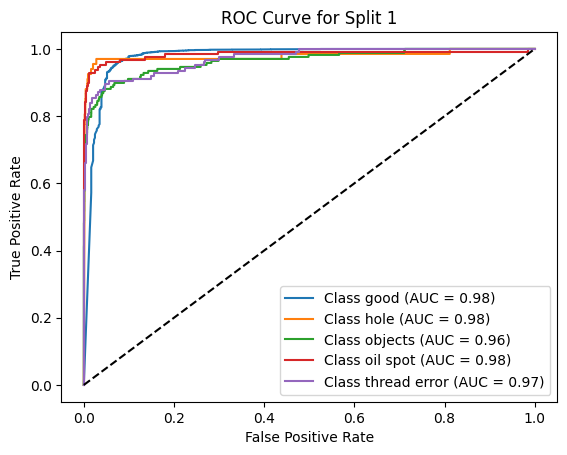


Split 2/5
Epoch 1/20
   1/2897 ━━━━━━━━━━━━━━━━━━━━ 50:06:46 62s/step - accuracy: 0.1250 - loss: 2.0778

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import RandomOverSampler
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Dataset parameters
data_dir = '/kaggle/input/tilda-400-64x64-patches'
img_size = (64, 64)
batch_size = 32
num_classes = 5
class_names = ['good', 'hole', 'objects', 'oil spot', 'thread error']

# Load and preprocess data
images = []
labels = []

for class_index, class_name in enumerate(class_names):
    class_path = os.path.join(data_dir, class_name)
    for file_name in os.listdir(class_path):
        file_path = os.path.join(class_path, file_name)
        img = load_img(file_path, target_size=img_size)
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
        labels.append(class_index)

images = np.array(images)
labels = np.array(labels)

# Perform 5 randomized holdout splits
num_splits = 5
results = []

for split in range(num_splits):
    print(f"\nSplit {split + 1}/{num_splits}")

    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=split)

    # Oversampling the minority classes
    ros = RandomOverSampler(random_state=split)
    X_train_flat = X_train.reshape((X_train.shape[0], -1))  # Flatten for oversampling
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train_flat, y_train)
    X_train_resampled = X_train_resampled.reshape((-1, *img_size, 3))  # Reshape back

    # One-hot encode labels
    y_train_one_hot = to_categorical(y_train_resampled, num_classes=num_classes)
    y_val_one_hot = to_categorical(y_val, num_classes=num_classes)

    # Build Model
    base_model = EfficientNetB0(include_top=False, input_shape=(*img_size, 3), weights='imagenet')
    base_model.trainable = True  # Unfreeze for fine-tuning

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the Model
    epochs = 20
    history = model.fit(
        X_train_resampled, y_train_one_hot,
        validation_data=(X_val, y_val_one_hot),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Evaluate Model
    val_preds = model.predict(X_val)
    predicted_classes = np.argmax(val_preds, axis=1)
    true_classes = y_val

    # Classification Report
    print("Classification Report:")
    report = classification_report(true_classes, predicted_classes, target_names=class_names, output_dict=True)
    print(classification_report(true_classes, predicted_classes, target_names=class_names))

    # Confusion Matrix
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    print("Confusion Matrix:")
    print(conf_matrix)

    # ROC/AUC Curve
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val_one_hot[:, i], val_preds[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC Curves
    plt.figure()
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {class_names[i]} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Split {split + 1}')
    plt.legend(loc='lower right')
    plt.show()

    # Store results
    results.append({
        "split": split + 1,
        "history": history.history,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
        "roc_auc": roc_auc
    })

# Plot aggregate metrics
plt.figure(figsize=(12, 5))

# Aggregate Accuracy and Loss
for split_result in results:
    history = split_result["history"]

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label=f"Split {split_result['split']} Training")
    plt.plot(history['val_accuracy'], label=f"Split {split_result['split']} Validation")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy (Across Splits)')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label=f"Split {split_result['split']} Training")
    plt.plot(history['val_loss'], label=f"Split {split_result['split']} Validation")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss (Across Splits)')
    plt.legend


    feature_extractor = Model(inputs=model.input, outputs=base_model.output)
    X_val_features = feature_extractor.predict(X_val)
    X_val_features_flat = X_val_features.reshape(X_val_features.shape[0], -1)

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    X_val_tsne = tsne.fit_transform(X_val_features_flat)

    # Plot t-SNE
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_val_tsne[:, 0], y=X_val_tsne[:, 1], hue=true_classes, palette="bright", alpha=0.7)
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.title(f't-SNE Visualization of Feature Representations (Split {split + 1})')
    plt.legend(title="Classes", labels=class_names)
    plt.show()

plt.tight_layout()
plt.show()